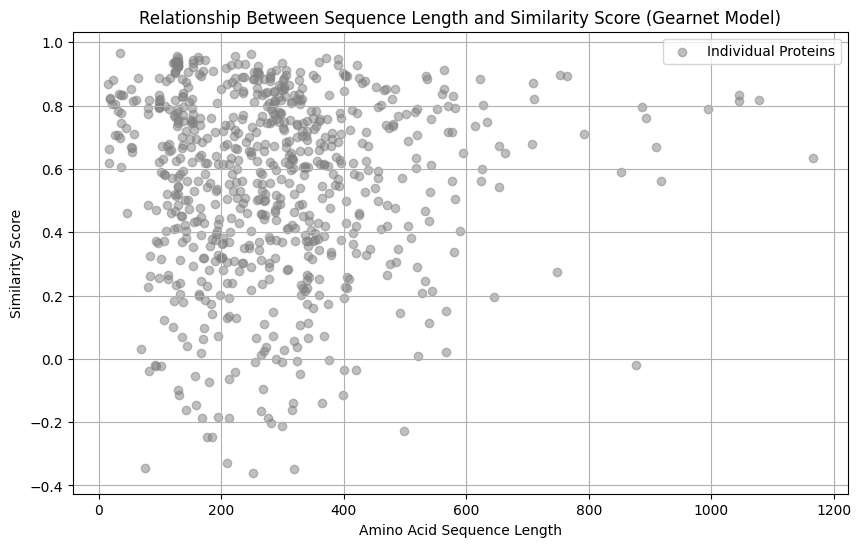

In [3]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())
length_to_scores = defaultdict(list)

for protein in common_proteins:
    text_description = gearnet_data[protein]["text_description"]
    match = re.search(r"length of: (\d+) amino acids", text_description)
    if match:
        sequence_length = int(match.group(1))
        similarity_score = gearnet_data[protein]["similarity_score"]
        length_to_scores[sequence_length].append(similarity_score)

# Prepare data for plotting
x_vals = []
y_vals = []
average_vals = []

# Calculate average similarity scores for each sequence length
for length, scores in length_to_scores.items():
    x_vals.extend([length] * len(scores))
    y_vals.extend(scores)
    average_vals.append((length, sum(scores) / len(scores)))

# Sort average values by sequence length for smooth line plotting
average_vals.sort()
avg_x, avg_y = zip(*average_vals)

# Plot the line graph and scatter dots
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")
# plt.plot(avg_x, avg_y, color='blue', label="Average Similarity Score")

# Adding labels and title
plt.xlabel('Amino Acid Sequence Length')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Sequence Length and Similarity Score (Gearnet Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()

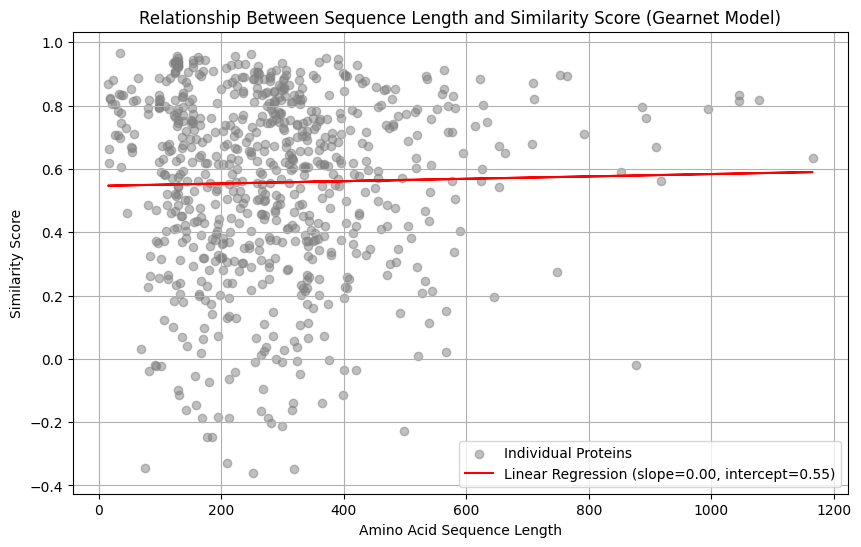

In [6]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())
length_to_scores = defaultdict(list)

for protein in common_proteins:
    text_description = gearnet_data[protein]["text_description"]
    match = re.search(r"length of: (\d+) amino acids", text_description)
    if match:
        sequence_length = int(match.group(1))
        similarity_score = gearnet_data[protein]["similarity_score"]
        length_to_scores[sequence_length].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for length, scores in length_to_scores.items():
    x_vals.extend([length] * len(scores))
    y_vals.extend(scores)

# Convert the lists into NumPy arrays for regression
x_vals_np = np.array(x_vals).reshape(-1, 1)  # X needs to be a 2D array for scikit-learn
y_vals_np = np.array(y_vals)

# Step 2: Perform linear regression
model = LinearRegression()
model.fit(x_vals_np, y_vals_np)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values for the regression line
y_pred = model.predict(x_vals_np)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")
plt.plot(x_vals_np, y_pred, color='red', label=f"Linear Regression (slope={slope:.2f}, intercept={intercept:.2f})")

# Adding labels and title
plt.xlabel('Amino Acid Sequence Length')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Sequence Length and Similarity Score (Gearnet Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


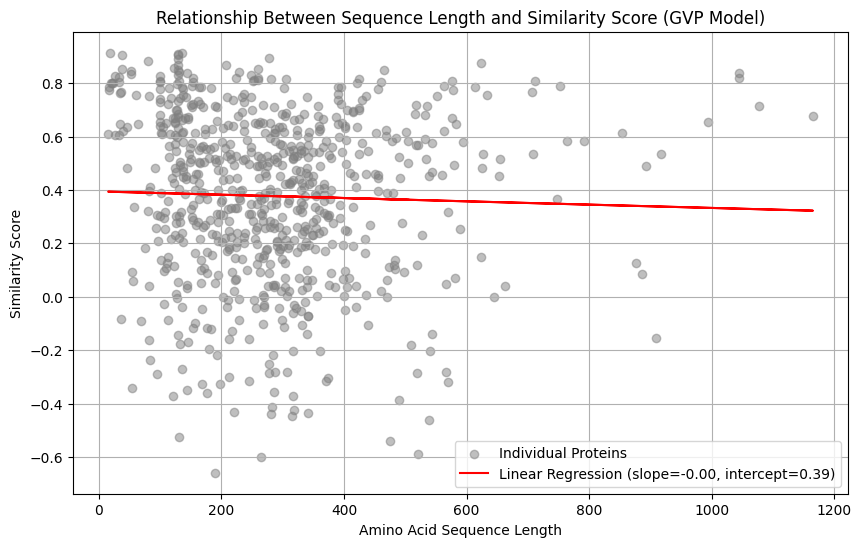

In [7]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())
length_to_scores = defaultdict(list)

for protein in common_proteins:
    text_description = gvp_data[protein]["text_description"]
    match = re.search(r"length of: (\d+) amino acids", text_description)
    if match:
        sequence_length = int(match.group(1))
        similarity_score = gvp_data[protein]["similarity_score"]
        length_to_scores[sequence_length].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for length, scores in length_to_scores.items():
    x_vals.extend([length] * len(scores))
    y_vals.extend(scores)

# Convert the lists into NumPy arrays for regression
x_vals_np = np.array(x_vals).reshape(-1, 1)  # X needs to be a 2D array for scikit-learn
y_vals_np = np.array(y_vals)

# Step 2: Perform linear regression
model = LinearRegression()
model.fit(x_vals_np, y_vals_np)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values for the regression line
y_pred = model.predict(x_vals_np)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")
plt.plot(x_vals_np, y_pred, color='red', label=f"Linear Regression (slope={slope:.2f}, intercept={intercept:.2f})")

# Adding labels and title
plt.xlabel('Amino Acid Sequence Length')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Sequence Length and Similarity Score (GVP Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


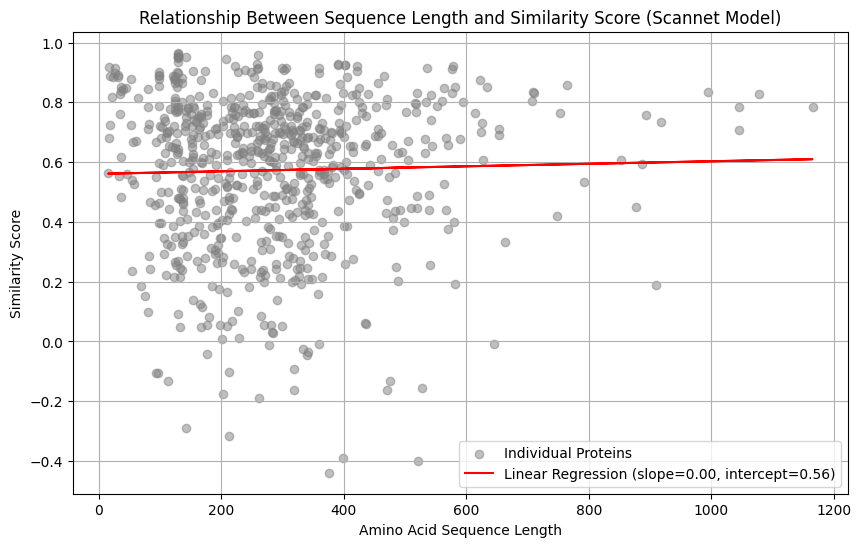

In [8]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())
length_to_scores = defaultdict(list)

for protein in common_proteins:
    text_description = scannet_data[protein]["text_description"]
    match = re.search(r"length of: (\d+) amino acids", text_description)
    if match:
        sequence_length = int(match.group(1))
        similarity_score = scannet_data[protein]["similarity_score"]
        length_to_scores[sequence_length].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for length, scores in length_to_scores.items():
    x_vals.extend([length] * len(scores))
    y_vals.extend(scores)

# Convert the lists into NumPy arrays for regression
x_vals_np = np.array(x_vals).reshape(-1, 1)  # X needs to be a 2D array for scikit-learn
y_vals_np = np.array(y_vals)

# Step 2: Perform linear regression
model = LinearRegression()
model.fit(x_vals_np, y_vals_np)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values for the regression line
y_pred = model.predict(x_vals_np)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")
plt.plot(x_vals_np, y_pred, color='red', label=f"Linear Regression (slope={slope:.2f}, intercept={intercept:.2f})")

# Adding labels and title
plt.xlabel('Amino Acid Sequence Length')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Sequence Length and Similarity Score (Scannet Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


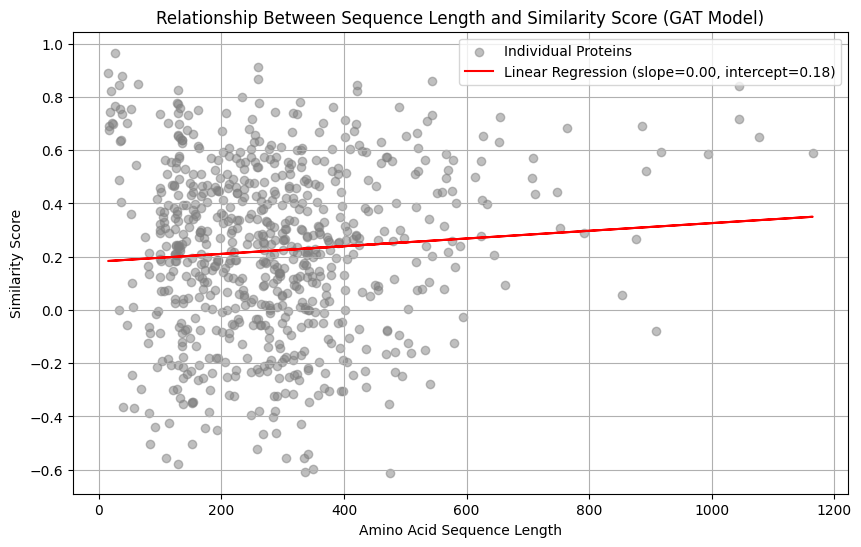

In [9]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())
length_to_scores = defaultdict(list)

for protein in common_proteins:
    text_description = gat_data[protein]["text_description"]
    match = re.search(r"length of: (\d+) amino acids", text_description)
    if match:
        sequence_length = int(match.group(1))
        similarity_score = gat_data[protein]["similarity_score"]
        length_to_scores[sequence_length].append(similarity_score)

# Prepare data for linear regression and plotting
x_vals = []
y_vals = []

# Flatten the data for linear regression
for length, scores in length_to_scores.items():
    x_vals.extend([length] * len(scores))
    y_vals.extend(scores)

# Convert the lists into NumPy arrays for regression
x_vals_np = np.array(x_vals).reshape(-1, 1)  # X needs to be a 2D array for scikit-learn
y_vals_np = np.array(y_vals)

# Step 2: Perform linear regression
model = LinearRegression()
model.fit(x_vals_np, y_vals_np)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values for the regression line
y_pred = model.predict(x_vals_np)

# Step 3: Plot the original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label="Individual Proteins")
plt.plot(x_vals_np, y_pred, color='red', label=f"Linear Regression (slope={slope:.2f}, intercept={intercept:.2f})")

# Adding labels and title
plt.xlabel('Amino Acid Sequence Length')
plt.ylabel('Similarity Score')
plt.title('Relationship Between Sequence Length and Similarity Score (GAT Model)')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()
